# 07 - Neural Networks - Malignant Cancer Detection 

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix


In this first cell we will upload the CSV files that contain the pre-sorted and pre-normalized data. 
For these I used the Wisconsin breast cancer dataset, sorted it into training and test sets with the 'input' values to the Neural Network as 'X' values, and the expected 'output' (a 0 if benign and a 1 if malignant) as the 'Y' values.

The data set is available at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Ten real-valued X features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)



In [2]:
X_train = pd.read_csv("xtrain.csv", header=None)
Y_train = pd.read_csv("ytrain.csv", header=None)
X_test = pd.read_csv("xtest.csv", header=None)
Y_test = pd.read_csv("ytest.csv", header=None)

Now I'm going to use Keras to define a Neural network that will be trained off of this data. This Neural Network can then be used to predict future values for breast cancer presence. 

In [3]:
X_train.describe()

0             1             2             3             4   \
count  4.550000e+02  4.550000e+02  4.550000e+02  4.550000e+02  4.550000e+02   
mean   6.246530e-17  9.525958e-16  8.510897e-16  3.123265e-16 -4.353050e-16   
std    1.001101e+00  1.001101e+00  1.001101e+00  1.001101e+00  1.001101e+00   
min   -2.019404e+00 -2.272988e+00 -1.977589e+00 -1.426379e+00 -3.176344e+00   
25%   -6.873871e-01 -7.420774e-01 -6.883840e-01 -6.577342e-01 -7.082998e-01   
50%   -2.357361e-01 -9.697672e-02 -2.403944e-01 -3.131017e-01 -3.433938e-02   
75%    4.551909e-01  5.866375e-01  4.871769e-01  3.009759e-01  6.519540e-01   
max    3.963628e+00  3.528104e+00  3.980919e+00  5.163006e+00  3.503046e+00   

                 5             6             7             8             9   \
count  4.550000e+02  4.550000e+02  4.550000e+02  4.550000e+02  4.550000e+02   
mean  -1.171224e-17 -1.795877e-16  9.369794e-17 -6.178208e-16 -1.397661e-15   
std    1.001101e+00  1.001101e+00  1.001101e+00  1.001101e+00  1.001101e+00   
min   -1.664312e+00 -1.125696e+00 -1.262871e+00 -2.738225e+00 -1.865718e+00   
25%   -7.367713e-01 -7.403181e-01 -7.254573e-01 -6.975035e-01 -7.022156e-01   
50%   -2.188714e-01 -3.517235e-01 -3.963173e-01 -6.354630e-02 -1.656097e-01   
75%    5.151506e-01  4.775784e-01  6.589276e-01  5.320447e-01  4.590848e-01   
max    4.125777e+00  4.366097e+00  3.955644e+00  4.496561e+00  5.105021e+00   

       ...            20            21            22            23  \
count  ...  4.550000e+02  4.550000e+02  4.550000e+02  4.550000e+02   
mean   ... -4.841060e-16  4.958183e-16  6.168448e-16  1.327388e-16   
std    ...  1.001101e+00  1.001101e+00  1.001101e+00  1.001101e+00   
min    ... -1.704360e+00 -2.218398e+00 -1.673608e+00 -1.188201e+00   
25%    ... -6.624319e-01 -7.439783e-01 -6.767688e-01 -6.257607e-01   
50%    ... -2.878293e-01 -5.394673e-02 -2.932556e-01 -3.516681e-01   
75%    ...  4.409060e-01  6.229571e-01  5.074669e-01  2.583182e-01   
max    ...  4.049783e+00  3.938555e+00  4.261315e+00  5.758096e+00   

                 24            25            26            27            28  \
count  4.550000e+02  4.550000e+02  4.550000e+02  4.550000e+02  4.550000e+02   
mean  -1.854438e-16 -1.171224e-17  3.045183e-16  4.684897e-17  4.997224e-16   
std    1.001101e+00  1.001101e+00  1.001101e+00  1.001101e+00  1.001101e+00   
min   -2.711807e+00 -1.468356e+00 -1.341360e+00 -1.754014e+00 -2.128278e+00   
25%   -7.105576e-01 -6.807320e-01 -7.569093e-01 -7.585201e-01 -6.518526e-01   
50%   -3.801757e-02 -2.619431e-01 -1.970300e-01 -2.427267e-01 -1.416994e-01   
75%    5.659411e-01  5.435962e-01  5.549081e-01  7.103914e-01  4.542741e-01   
max    3.988374e+00  5.270909e+00  4.936910e+00  2.695096e+00  5.934052e+00   

                 29  
count  4.550000e+02  
mean  -3.416071e-16  
std    1.001101e+00  
min   -1.598903e+00  
25%   -6.814765e-01  
50%   -2.181271e-01  
75%    4.568064e-01  
max    6.968987e+00  

[8 rows x 30 columns]

Notice that the mean of each of the features is Zero and the Standard Deviation is 1.  This means that this data set was preprocessed and normalized.

In [4]:
neg_tot, pos_tot = np.bincount(Y_train[0])
total_tot = neg_tot + pos_tot
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total_tot, pos_tot, 100 * pos_tot / total_tot))


Examples:
    Total: 455
    Positive: 165 (36.26% of total)



Notice that in the training set, 36% samples are positive.  This means that we have a lot of samples where the patient had cancer.  This means that the data is balanced and our algorithm might be able to learn from the data.

In [5]:
negtest_tot, postest_tot = np.bincount(Y_test[0])
totaltest_tot = negtest_tot + postest_tot
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    totaltest_tot, postest_tot, 100 * postest_tot / total_tot))

Examples:
    Total: 114
    Positive: 47 (10.33% of total)



We have 114 cases for our test, with a different distribution.  Our data was split into 80% train and 20% test.  This is typical when we have a small dataset

In [6]:
classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 25, activation = 'sigmoid', input_dim = 30))
classifier.add(Dense(units = 10, activation = 'sigmoid'))
classifier.add(Dense(units = 10, activation = 'sigmoid'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Once the Neural Network is defined, I now have to specify is the optimizer and loss function

In [7]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

classifier.compile(
    optimizer = 'rmsprop', 
    loss = 'binary_crossentropy',
    metrics=METRICS)

You now train the neural network using Classifier.fit, passing it the training data -- i.e. for this set of X, this is what the Y should look like. The NN will then spot the patterns in the data, and build a neural network that could replicate that. 

In [8]:
results = classifier.fit(X_train, Y_train, batch_size = 1, epochs = 50, validation_data=(X_test, Y_test))

Epoch 1/50
455/455 [==============================] - 16s 4ms/step - loss: 0.6241 - tp: 35.3240 - fp: 23.7515 - tn: 45.2144 - fn: 10.4591 - accuracy: 0.6076 - precision: 0.5552 - recall: 0.8779 - auc: 0.7306 - prc: 0.6195 - val_loss: 0.4082 - val_tp: 132.6228 - val_fp: 31.0000 - val_tn: 293.9825 - val_fn: 54.8947 - val_accuracy: 0.8319 - val_precision: 0.8093 - val_recall: 0.7061 - val_auc: 0.9073 - val_prc: 0.8327
Epoch 2/50
455/455 [==============================] - 1s 2ms/step - loss: 0.3419 - tp: 186.4897 - fp: 32.8959 - tn: 398.3682 - fn: 65.9951 - accuracy: 0.8539 - precision: 0.8478 - recall: 0.7365 - auc: 0.9287 - prc: 0.8848 - val_loss: 0.2052 - val_tp: 320.4561 - val_fp: 38.5965 - val_tn: 643.3860 - val_fn: 79.0614 - val_accuracy: 0.8912 - val_precision: 0.8924 - val_recall: 0.8019 - val_auc: 0.9577 - val_prc: 0.9341
Epoch 3/50
455/455 [==============================] - 1s 1ms/step - loss: 0.1501 - tp: 383.7173 - fp: 40.8079 - tn: 745.0307 - fn: 83.1930 - accuracy: 0.9007 - p

455/455 [==============================] - 1s 2ms/step - loss: 0.0579 - tp: 3881.7448 - fp: 133.7546 - tn: 6723.5571 - fn: 186.6924 - accuracy: 0.9707 - precision: 0.9667 - recall: 0.9541 - auc: 0.9863 - prc: 0.9852 - val_loss: 0.1116 - val_tp: 4025.4211 - val_fp: 135.1930 - val_tn: 6972.7896 - val_fn: 190.0965 - val_accuracy: 0.9713 - val_precision: 0.9675 - val_recall: 0.9549 - val_auc: 0.9865 - val_prc: 0.9855
Epoch 21/50
455/455 [==============================] - 1s 2ms/step - loss: 0.1083 - tp: 4091.3498 - fp: 136.9461 - tn: 7073.1150 - fn: 193.3381 - accuracy: 0.9713 - precision: 0.9676 - recall: 0.9549 - auc: 0.9863 - prc: 0.9854 - val_loss: 0.1217 - val_tp: 4231.4209 - val_fp: 138.1930 - val_tn: 7326.7896 - val_fn: 196.0965 - val_accuracy: 0.9719 - val_precision: 0.9684 - val_recall: 0.9557 - val_auc: 0.9865 - val_prc: 0.9857
Epoch 22/50
455/455 [==============================] - 1s 1ms/step - loss: 0.1224 - tp: 4289.8640 - fp: 139.8679 - tn: 7434.3596 - fn: 199.6574 - accuracy

455/455 [==============================] - 1s 2ms/step - loss: 0.1096 - tp: 7789.7624 - fp: 173.0149 - tn: 13470.5869 - fn: 303.3846 - accuracy: 0.9781 - precision: 0.9783 - recall: 0.9625 - auc: 0.9864 - prc: 0.9875 - val_loss: 0.1554 - val_tp: 7936.4209 - val_fp: 174.0000 - val_tn: 13716.9824 - val_fn: 307.0965 - val_accuracy: 0.9783 - val_precision: 0.9785 - val_recall: 0.9627 - val_auc: 0.9865 - val_prc: 0.9877
Epoch 40/50
455/455 [==============================] - 1s 2ms/step - loss: 0.0697 - tp: 8001.1617 - fp: 174.0000 - tn: 13820.5745 - fn: 310.0127 - accuracy: 0.9783 - precision: 0.9787 - recall: 0.9627 - auc: 0.9864 - prc: 0.9876 - val_loss: 0.1509 - val_tp: 8141.4209 - val_fp: 174.0000 - val_tn: 14073.9824 - val_fn: 314.0965 - val_accuracy: 0.9785 - val_precision: 0.9791 - val_recall: 0.9629 - val_auc: 0.9864 - val_prc: 0.9877
Epoch 41/50
455/455 [==============================] - 1s 1ms/step - loss: 0.0751 - tp: 8202.6381 - fp: 174.6346 - tn: 14180.7709 - fn: 316.7054 - acc

To predict new values, the Neural Network uses classifier.predict. I'm going to pass it the test values for X (which the Neural Network hasn't previously seen) and it will give me back a set of predictions. These predicitons will be probabilities, so I will clean them up by saying that if they are greater than .5, I'll make them 1, else I'll make them 0.

In [9]:
Y_pred = classifier.predict(X_test)
Y_predBin = [ 1 if y>=0.5 else 0 for y in Y_pred ]

Now we can loop through the set of predicitons for the test set (called Y_pred) and the actual values for the test set (celled Y_test), and see how alike they are -- if they are the same, I'll increment 'correct', otherwise I'll incrememnt 'wrong'. 

In [10]:
total = 0
correct = 0
wrong = 0
for i in range(len(Y_predBin)):
  total=total+1
  if(Y_test.at[i,0] == Y_predBin[i]):
    correct=correct+1
  else:
    wrong=wrong+1

print("Total " + str(total))
print("Correct " + str(correct))
print("Wrong " + str(wrong))

Total 114
Correct 111
Wrong 3


In [11]:
def plotConfusion(test_labels, predictions_baseline):
    cm = confusion_matrix(test_labels, predictions_baseline)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(0.5))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    truePositives = cm[1][1]
    trueNegatives = cm[0][0]
    falsePositives = cm[0][1]
    falseNegatives = cm[1][0]
    
    precision = truePositives / (truePositives + falsePositives)
    recall = truePositives / (truePositives + falseNegatives)
    f1ScoreCalculated =  2 * (precision * recall) / (precision + recall)
    
    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))
    print('Precision: {:.4f}'.format(precision))
    print('Recall: {:.4f}'.format(recall))
    print('F1 Score Calculated: {:.4f}'.format(f1ScoreCalculated))

Legitimate Transactions Detected (True Negatives):  67
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  3
Fraudulent Transactions Detected (True Positives):  44
Total Fraudulent Transactions:  47
Precision: 1.0000
Recall: 0.9362
F1 Score Calculated: 0.9670


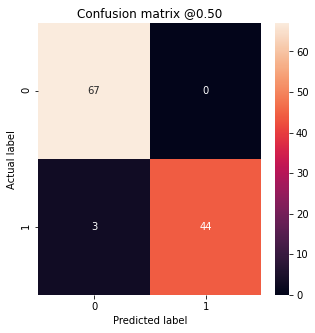

In [12]:
plotConfusion(Y_test, Y_predBin)

In [13]:
def plot_metrics(history):
  metrics = ['loss', 'prc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

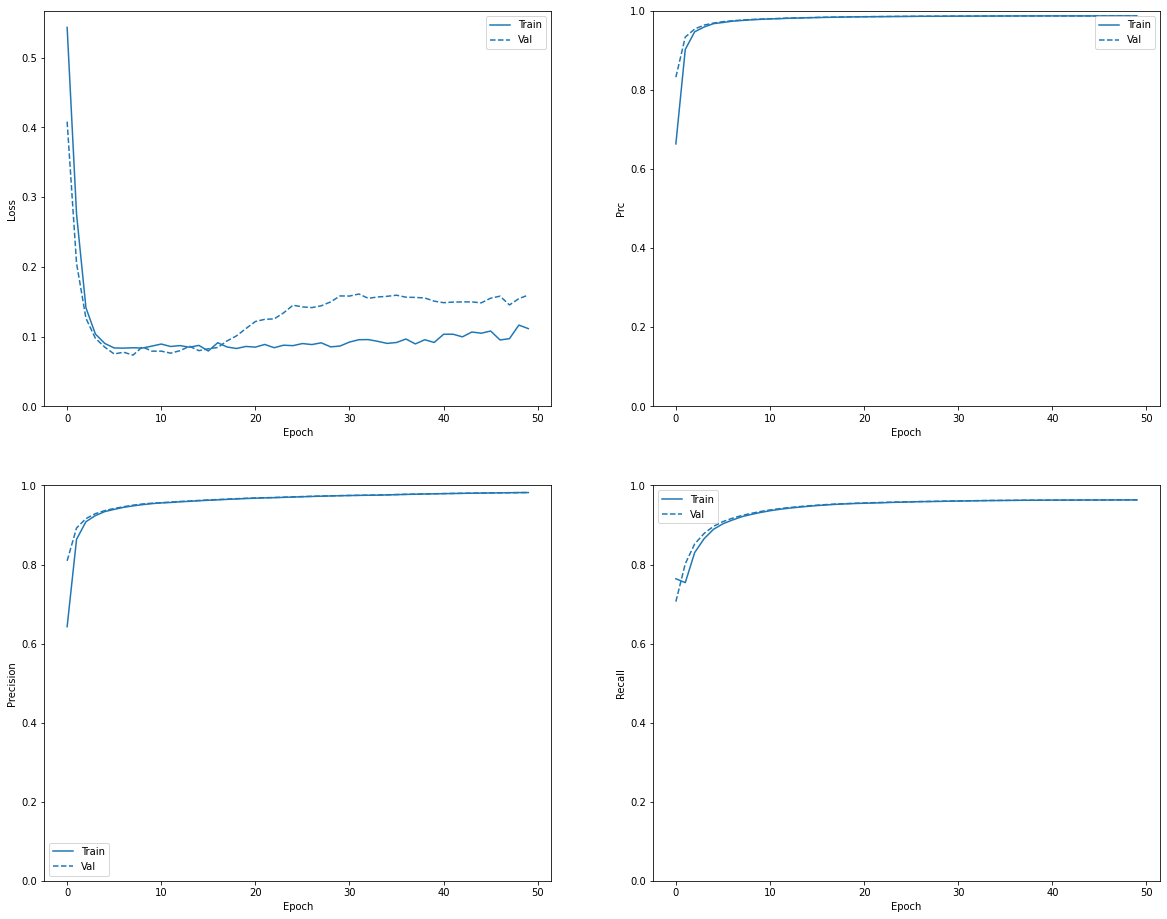

In [14]:
mpl.rcParams['figure.figsize'] = (20, 16)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plot_metrics(results)